<a href="https://colab.research.google.com/github/elisdiasds/EBAC/blob/main/Profissao_Analista_de_dados_M13_Exercicio_V02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://raw.githubusercontent.com/andre-marcos-perez/ebac-course-utils/main/media/logo/newebac_logo_black_half.png" alt="ebac-logo">

---

# **Módulo** | Análise de Dados: Data Wrangling II
Caderno de **Exercícios**<br>
Professor [André Perez](https://www.linkedin.com/in/andremarcosperez/)

---

# **Tópicos**

<ol type="1">
  <li>Agregação e Ordenação;</li>
  <li>Combinação;</li>
  <li>Técnicas Avançadas.</li>
</ol>

---

# **Exercícios**

Neste exercícios, vamos trabalhar com dados geográficos, demográficos e econômicos do Brasil. Vamos manipular e combinar dados de duas frentes distintas para poder responder perguntas de negócios.

## 1\. Data Wrangling

### **1.1. Estados**

O arquivo `estados-bruto.xml` contém informações sobre estados (nome, sigla e região). **Carregue-o na máquina virtual do Google Colab**. Um arquivo do tipo XML é similar a um arquivo do tipo HTML, exemplo do estado do Acre:

```xml
<ESTADO>
  <ID>1</ID>
  <NOME>ACRE</NOME>
  <IDCAPITAL>16</IDCAPITAL>
  <SIGLA>AC</SIGLA>
  <REGIAO>NORTE</REGIAO>
</ESTADO>
```

Utilize o pacote Python `beautifulsoup4` para extrair os dados do arquivo `estados-bruto.xml` providenciado. Salve os dados extraidos no arquivo `estados-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;sigla;regiao
ACRE;AC;NORTE
ALAGOAS;AL;NORDESTE
AMAPA;AP;NORTE
```

**Dica**: Utilize o parser de xml chamado `lxml` do `beautifulsoup4`.

In [ ]:
# ler o arquivo estados-bruto.xml, utilize o xml parser chamado lxml

from bs4 import BeautifulSoup
import csv

NOME_ARQUIVO_FONTE = 'estados-bruto.xml'
NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'

with open(NOME_ARQUIVO_FONTE, 'r') as arquivo_fonte:
  fonte = BeautifulSoup(arquivo_fonte, 'lxml')

<ipython-input-9-51f4cfe9d56e>:10: XMLParsedAsHTMLWarning: It looks like you're parsing an XML document using an HTML parser. If this really is an HTML document (maybe it's XHTML?), you can ignore or filter this warning. If it's XML, you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the lxml package installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.
  fonte = BeautifulSoup(arquivo_fonte, 'lxml')


In [ ]:
# visualize os resultados

fonte

<?xml version="1.0" encoding="utf-8" ?><html><body><estados>
<estado>
<id>1</id>
<nome>ACRE</nome>
<idcapital>16</idcapital>
<sigla>AC</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>2</id>
<nome>ALAGOAS</nome>
<idcapital>68</idcapital>
<sigla>AL</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>3</id>
<nome>AMAPA</nome>
<idcapital>131</idcapital>
<sigla>AP</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>4</id>
<nome>AMAZONAS</nome>
<idcapital>178</idcapital>
<sigla>AM</sigla>
<regiao>NORTE</regiao>
</estado>
<estado>
<id>5</id>
<nome>BAHIA</nome>
<idcapital>536</idcapital>
<sigla>BA</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>6</id>
<nome>CEARA</nome>
<idcapital>676</idcapital>
<sigla>CE</sigla>
<regiao>NORDESTE</regiao>
</estado>
<estado>
<id>7</id>
<nome>DISTRITO FEDERAL</nome>
<idcapital>916</idcapital>
<sigla>DF</sigla>
<regiao>CENTRO-OESTE</regiao>
</estado>
<estado>
<id>8</id>
<nome>ESPIRITO SANTO</nome>
<idcapital>879</idcapital>
<sigla>ES</sigla

In [ ]:
# manipule os dados
# continue o codigo aqui
from bs4 import BeautifulSoup
import csv

estados = fonte.find_all('estado')





In [ ]:
# escrever o conteudo extraido no arquivo estados-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'estados-limpo.csv'
with open(NOME_ARQUIVO_DESTINO, 'w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file, delimiter=';')
    writer.writerow(['estado', 'sigla', 'regiao'])
    for estado in estados:
        nome = estado.find('nome').text
        sigla = estado.find('sigla').text
        regiao = estado.find('regiao').text
        writer.writerow([nome, sigla, regiao])
print(f'Dados extraídos com sucesso!')

# continue o codigo aqui

Dados extraídos com sucesso!


### **1.2. Cidades**

O arquivo `cidades-bruto.csv` contém informações demográficas e socioeconomicas das cidades do Brasil. **Carregue-o na máquina virtual do Google Colab**. Utilize o pacote Python `pandas` para extrair os dados do arquivo `cidades-bruto.xml` providenciado. Seguindo as seguintes especificações:

1. Apenas dados do censo de 2010;
1. Apenas as colunas UF, Nome, PIB, Pop_est_2009 e PIB_percapita.

Salve os dados extraidos no arquivo `cidades-limpo.csv` separado por `;`. Exemplo das três primeiras linhas mais o cabeçalho:

```
estado;cidade;populacao;pib;pib_percapita
BAHIA;TREMEDAL;18433;57883.9921875;3140.23999023
RIO GRANDE DO SUL;TURUÇU;4000;45723875;11430.96972656
ESPIRITO SANTO;VITÓRIA;320156;19782628;61790.58984375
```

In [ ]:
# ler o arquivo cidades-bruto.csv

import pandas as pd

NOME_ARQUIVO_FONTE = 'cidades-bruto.csv'

fonte = pd.read_csv(NOME_ARQUIVO_FONTE, sep=',')


In [ ]:
# visualize os resultados
# continue o codigo aqui
fonte


,FID,gid,UF,nome,Censo,PIB,Pop_est_2009,PIB_percapita,Descrição,legenda,classe,geom
0,vw_pib_percapita.fid-4514e25a_17aaa325034_-258f,215,BAHIA,Tremedal,2010.0,5.788399e+04,18433,3140.239990,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-41.458803305191566 -14.781415...
1,vw_pib_percapita.fid-4514e25a_17aaa325034_-258e,306,RIO GRANDE DO SUL,Turuçu,2010.0,4.572388e+04,4000,11430.969727,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-52.035349932081274 -31.567509...
2,vw_pib_percapita.fid-4514e25a_17aaa325034_-258d,900,ESPIRITO SANTO,Vitória,2010.0,1.978263e+07,320156,61790.589844,Produto Interno Bruto per capita,52702.10 - 133669.00,4,MULTIPOLYGON (((-40.3292566978242 -20.23997417...
3,vw_pib_percapita.fid-4514e25a_17aaa325034_-258c,3613,MINAS GERAIS,Jacutinga,2010.0,2.478160e+05,21424,11567.209961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-46.50528160015326 -22.3400120...
4,vw_pib_percapita.fid-4514e25a_17aaa325034_-258b,1028,PIAUÍ,Nazária,2010.0,2.095138e+04,7895,2653.750000,Produto Interno Bruto per capita,- 9639.65,1,POLYGON ((-42.826685407155495 -5.3480291684437...
...,...,...,...,...,...,...,...,...,...,...,...,...
5561,vw_pib_percapita.fid-4514e25a_17aaa325034_-eba,5254,SANTA CATARINA,Campo Erê,2010.0,1.876289e+05,9737,19269.679688,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.024131281087385 -26.361357...
5562,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb9,2749,PARANÁ,Planalto,2010.0,1.385535e+05,13983,9908.709961,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-53.61882711231503 -25.6460599...
5563,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb8,3779,SÃO PAULO,Guararapes,2010.0,5.320191e+05,29639,17949.970703,Produto Interno Bruto per capita,9639.65 - 22144.80,2,MULTIPOLYGON (((-50.70271677275949 -21.0257124...
5564,vw_pib_percapita.fid-4514e25a_17aaa325034_-eb7,617,RIO GRANDE DO SUL,Barra do Guarita,2010.0,2.198064e+04,3067,7166.819824,Produto Interno Bruto per capita,- 9639.65,1,MULTIPOLYGON (((-53.778785810369236 -27.152703...


In [ ]:
# manipule os dados
df_2010 = fonte[fonte['Censo'] == 2010]
colunas_desejadas = ['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita'] # Changed 'Nome' to 'nome'
df_filtro = df_2010[colunas_desejadas]
df_filtro.to_csv('cidades-limpo.csv', sep=';', index=False)

# continue o codigo aqui

In [ ]:
# escrever o conteudo extraido no arquivo cidades-limpo.csv separados por ;

NOME_ARQUIVO_DESTINO = 'cidades-limpo.csv'
df_filtro.head(3)
# continue o codigo aqui

,UF,nome,PIB,Pop_est_2009,PIB_percapita
0,BAHIA,Tremedal,5.788399e+04,18433,3140.239990
1,RIO GRANDE DO SUL,Turuçu,4.572388e+04,4000,11430.969727
2,ESPIRITO SANTO,Vitória,1.978263e+07,320156,61790.589844


### **1.3. Brasil**

Utilize o pacote Python `pandas` para combinar os dados do arquivo `estados-limpo.csv` com os dados do arquivo `cidades-limpo.csv` em um único dataframe. Escolha a coluna e o método de combinação de tal forma que **não haja perda de dados** no processo (não produzirá valores nulos `NaN`). Salve os dados do dataframe no arquivo `brasil.csv`

In [ ]:
# solução do exercício 1.3
import pandas as pd
estados_df = pd.read_csv('estados-limpo.csv', sep=';')
cidades_df = pd.read_csv('cidades-limpo.csv', sep=';')

print(estados_df.columns)
print(cidades_df.columns)

estados_df['estado'] = estados_df['estado'].str.upper()
cidades_df['UF'] = cidades_df['UF'].str.upper()

Index(['estado', 'sigla', 'regiao'], dtype='object')
Index(['UF', 'nome', 'PIB', 'Pop_est_2009', 'PIB_percapita'], dtype='object')


---

## 2\. Data Analytics

### **2.1. DataFrame**

Utilize o pacote Python `pandas` para carregar o arquivo `brasil.csv` no dataframe `brasil_df`.

In [ ]:
# solução do exercício 2.1
brasil_df = pd.merge(estados_df, cidades_df, left_on='estado', right_on='UF', how='inner')
brasil_df.to_csv('brasil.csv', sep=';', index=False)

### **2.2. Analise**

Utilize o dataframe `brasil_df` para responder as seguintes perguntas de negócio:

 - Quais são as 10 cidades mais populosas do Brasil?

In [ ]:
# código para responder a pergunta
cidades_mais_populosas = brasil_df[['nome', 'Pop_est_2009']].sort_values(by='Pop_est_2009', ascending=False).head(10)
print("As 10 cidades mais populosas do Brasil são:\n", cidades_mais_populosas)


As 10 cidades mais populosas do Brasil são:
                  nome  Pop_est_2009
1096   Rio de Janeiro       6186710
230          Salvador       2998056
602          Brasília       2606885
3102   Belo Horizonte       2452617
126            Manaus       1738641
1019           Recife       1561659
1423     Porto Alegre       1436123
1117      São Gonçalo        991382
105            Maceió        936314
1153  Duque de Caxias        872762


 - Quais são as 5 cidades com a menor PIB per capita da região nordeste?

In [ ]:
# código para responder a pergunta
nordeste_df = brasil_df[brasil_df['regiao'] == 'NORDESTE']
cidades_com_menor_pib = nordeste_df.sort_values(by='PIB_percapita', ascending=True).head(5)
print("As 5 cidades com a menor PIB per capita da região nordeste são:\n", cidades_com_menor_pib)

As 5 cidades com a menor PIB per capita da região nordeste são:
       estado sigla    regiao       UF          nome           PIB  \
548    BAHIA    BA  NORDESTE    BAHIA      Caetanos  30036.105469   
555    BAHIA    BA  NORDESTE    BAHIA  Novo Triunfo  36864.132812   
446    BAHIA    BA  NORDESTE    BAHIA        Matina  33801.074219   
57   ALAGOAS    AL  NORDESTE  ALAGOAS        Traipu  68499.687500   
397    BAHIA    BA  NORDESTE    BAHIA      Mansidão  32635.740234   

     Pop_est_2009  PIB_percapita  
548         12307    2440.570068  
555         14763    2497.060059  
446         13245    2551.989990  
57          25854    2649.479980  
397         12244    2665.449951  


 - Quais são as 15 cidades com maior PIB do do estado de São Paulo?

In [ ]:
# código para responder a pergunta
sp_df = brasil_df[brasil_df['estado'] == 'são paulo']
brasil_df['PIB'] = pd.to_numeric(brasil_df['PIB'], errors='coerce').fillna(0)
maior_pib_sp = sp_df[['nome', 'PIB']].sort_values(by='PIB', ascending=False).head(15)
print("As 15 cidades com maior PIB do estado de São Paulo são:\n", maior_pib_sp)

As 15 cidades com maior PIB do estado de São Paulo são:
 Empty DataFrame
Columns: [nome, PIB]
Index: []


 - Qual é o PIB do estado de Santa Catarina?

In [ ]:
# código para responder a pergunta
# Qual é o PIB do estado de Santa Catarina?
sc_df = brasil_df[brasil_df['estado'].str.strip().str.lower() == 'santa catarina']

# Converter a coluna PIB para numérico (caso tenha sido carregada como string)
brasil_df['PIB'] = pd.to_numeric(brasil_df['PIB'], errors='coerce').fillna(0)

# Calcular o PIB total do estado
pib_sc = sc_df['PIB'].sum()

print("O PIB do estado de Santa Catarina é:", pib_sc)


O PIB do estado de Santa Catarina é: 129806256.75195317


 - Qual é o população da região sul?

In [ ]:
# código para responder a pergunta
rs_df = brasil_df[brasil_df['regiao'] == 'SUL']
populacao_rs = rs_df['Pop_est_2009'].sum()
print("A população da região sul é:", populacao_rs)

A população da região sul é: 17032871


 - Qual é o PIB per capito médio das cidades do Mato Grosso do Sul?

In [ ]:
# código para responder a pergunta
print("Estados únicos no dataset:", brasil_df['estado'].unique())

brasil_df['PIB_percapita'] = pd.to_numeric(brasil_df['PIB_percapita'], errors='coerce')
ms_df = brasil_df[brasil_df['estado'].str.strip().str.lower() == 'mato grosso do sul']

if ms_df.empty:
    print("Nenhuma cidade encontrada no estado de Mato Grosso do Sul.")
else:
  pib_percapita_ms = ms_df['PIB_percapita'].mean()
print("O PIB per capita médio das cidades do Mato Grosso do Sul é:", pib_percapita_ms)

Estados únicos no dataset: ['ACRE' 'ALAGOAS' 'AMAZONAS' 'BAHIA' 'DISTRITO FEDERAL' 'ESPIRITO SANTO'
 'MATO GROSSO' 'MATO GROSSO DO SUL' 'PERNAMBUCO' 'RIO DE JANEIRO'
 'RIO GRANDE DO NORTE' 'RIO GRANDE DO SUL' 'RORAIMA' 'SANTA CATARINA'
 'SERGIPE' 'TOCANTINS' 'MINAS GERAIS']
O PIB per capita médio das cidades do Mato Grosso do Sul é: 14458.896859975644


 - Qual é a população do Brasil?

In [ ]:
# código para responder a pergunta
populacao_brasil = brasil_df['Pop_est_2009'].sum()
print("A população do Brasil é:", populacao_brasil)

A população do Brasil é: 101885500


### **2.3. Visualização**

Utilize o dataframe `brasil_df` para gerar as seguintes visualizações.

 - Gere um gráfico de barras com as 10 cidades menos populosas do Brasil.

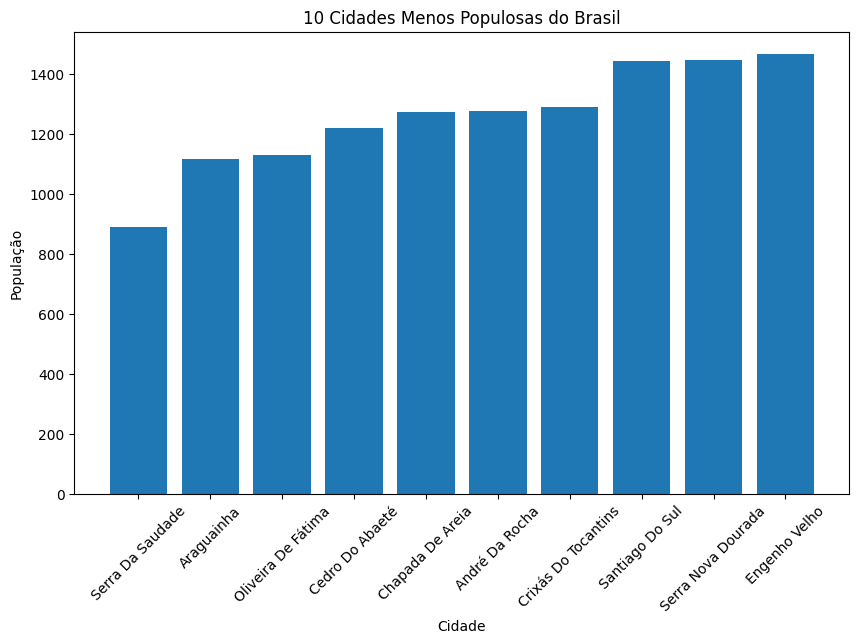

In [ ]:
# código para gerar a visualização
import matplotlib.pyplot as plt
cidades_menos_populosas = brasil_df.sort_values(by='Pop_est_2009', ascending=True).head(10)

plt.figure(figsize=(10, 6))
plt.bar(cidades_menos_populosas['nome'], cidades_menos_populosas['Pop_est_2009'])

plt.xlabel('Cidade')
plt.ylabel('População')
plt.title('10 Cidades Menos Populosas do Brasil')
plt.xticks(rotation=45)
plt.show()




 - Gere um gráfico de pizza com a proporção da população do Brasil por região.

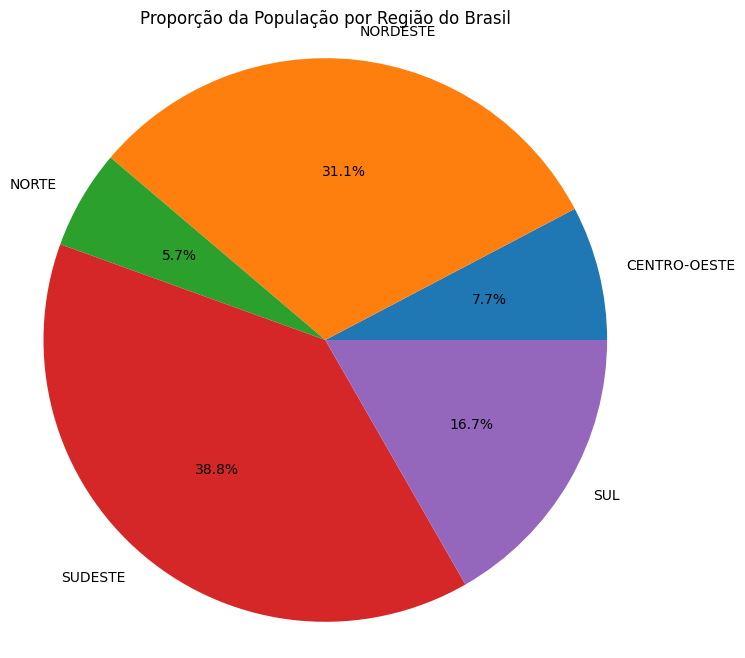

In [ ]:
# código para gerar a visualização
import matplotlib.pyplot as plt
populacao_regiao = brasil_df.groupby('regiao')['Pop_est_2009'].sum()

plt.figure(figsize=(8, 8))
plt.pie(populacao_regiao, labels=populacao_regiao.index, autopct='%1.1f%%')
plt.title('Proporção da População por Região do Brasil')
plt.axis('equal')
plt.show()